# Contexto

  Talvez a tragédia mais conhecida dentro da história moderna o naufrágio do Titanic, um navio de passageiros britânicos.
  
  Este teve sua viagem inaugural em 10 de abril de 1912, de Southampton com destino a Nova Iorque, colidindo com um iceberg no dia 14 de abril, naufragando na madrugada do dia seguinte mudando para a sempre as regras de segurança em alto mar.

# Objetivo

  Este projeto tem por objetivo analisar a base de dados acerca dos sobrevivents do Titanic e confeccionar um modelo capaz de prever quem sobreviveria com certa acurácia.
  
  Inicialmente serão importadas todas as bibliotecas que serão utilizadas dentro do projeto.
  
  Estes modelos por fim farão parte de uma competição onde o objetivo é obter o modelo com a maior acurâcia possível.
  
  A competição funciona de forma que ao treinar um modelo este deve criar a partir de parâmetros teste a reposta para um determinado número de passageiros em um arquivo csv e a acurâcia será testada durante a competição.
  
# Créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/c/titanic

- As bases de dados são dados dados sobre os passageiros como valor da passagem, sexo e classe do passageiro.
- Temos bases de 1309 passageiros divididos em três arquivos.

# Importação de bibliotecas e dados

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sv = pd.read_csv("gender_submission.csv")
teste = pd.read_csv("test.csv")
treino = pd.read_csv("train.csv")

Juntando os dataframes de treino e teste (posteriormente estes serão separados novamente)

In [3]:
treino["treino_teste"] = 1
teste["treino_teste"] = 0
teste["Survived"] = np.nan

data_df = pd.concat([treino,teste])
display(data_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,treino_teste
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Checando quais os tipos de dados presentes nas colunas e quantas linhas sem valores existem dentro destas colunas

In [4]:
print(data_df.dtypes)

print(data_df.isnull().sum())

PassengerId       int64
Survived        float64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
treino_teste      int64
dtype: object
PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
treino_teste       0
dtype: int64


In [5]:
#Removendo a coluna "Cabin", pois esta tem muitas linhas sem valores
data_df = data_df.drop("Cabin", axis = 1)

### Análise exploratória 

Checando a correlação entre as colunas numericas do dataframe e em seguida analisando as colunas individualmente

1. Iniciaremos através das colunas numéricas.
2. Em seguida serão analisadas as colunas que contém texto.

Também serão definidas as funções para criação de gráficos e posterior análise dos mesmos

In [6]:
def histograma(coluna):
    plt.figure(figsize = (10, 8))
    sns.histplot(data =coluna,bins = 30, kde=True)
    
def grafico_barras(coluna):
    plt.figure(figsize = (10,8))
    ax = sns.barplot(x =coluna.value_counts().index ,y = coluna.value_counts())
    
def nulo(coluna):
    print(f"Existem {coluna.isnull().sum()} linhas nulas nesta coluna.")

<AxesSubplot:>

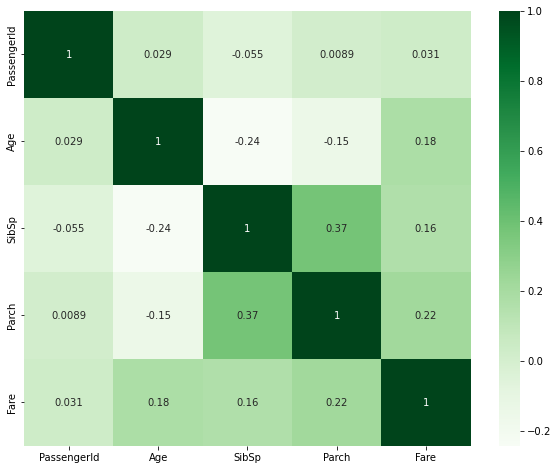

In [7]:
n_df = data_df[["PassengerId", "Age", "SibSp", "Parch", "Fare"]]

fig = plt.figure(figsize = (10,8))
sns.heatmap(n_df.corr(), annot = True, cmap = "Greens")

### Análise coluna: Age

Existem 263 linhas nulas nesta coluna.


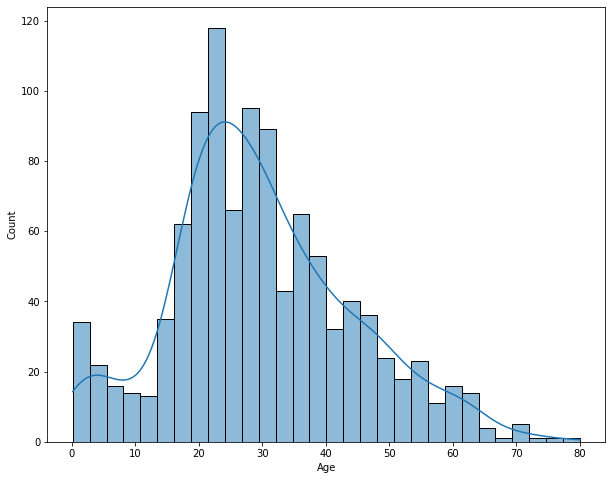

In [8]:
nulo(data_df["Age"])
histograma(data_df["Age"])

Como existem muitas linhas sem valores dentro desta coluna, foi optado por preencher estas pela média da coluna.

Existem 0 linhas nulas nesta coluna.


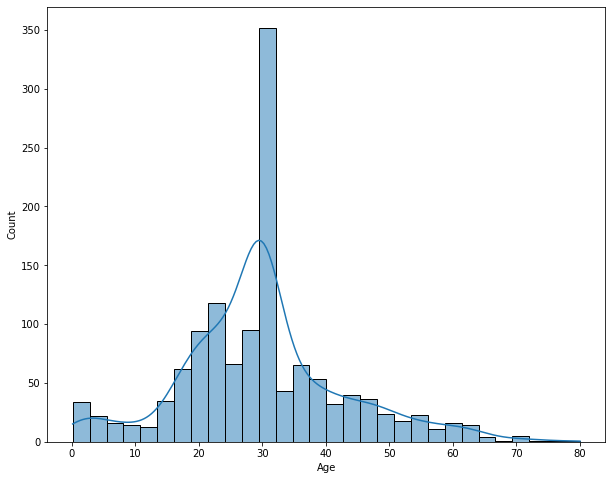

In [9]:
data_df["Age"] = data_df["Age"].fillna(data_df["Age"].mean())
nulo(data_df["Age"])
histograma(data_df["Age"])

Pode-se ver que há uma distribuição esperada dentro das idades, com uma maior incidencia entre 20 e 40 anos, dos passageiros presentes no navio, portanto não serão feitas mais mudanças dentro dessa coluna.

### Análise coluna: SibSp

Existem 0 linhas nulas nesta coluna.


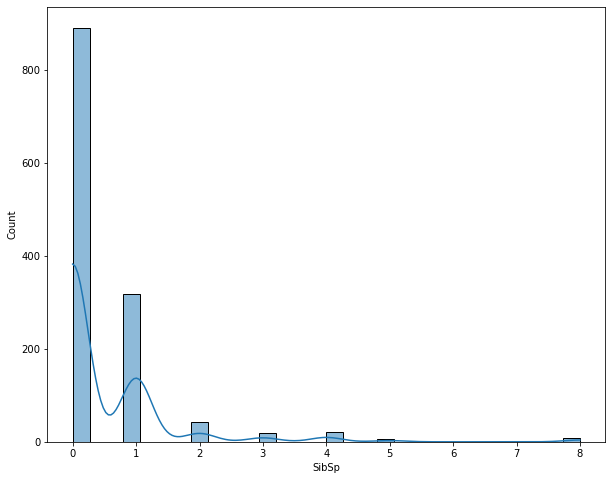

In [10]:
nulo(data_df["SibSp"])
histograma(data_df["SibSp"])

Como esta coluna não aparenta ter qualquer problema ou valores nulos esta será mantida assim.

### Análise coluna: Parch

Existem 0 linhas nulas nesta coluna.


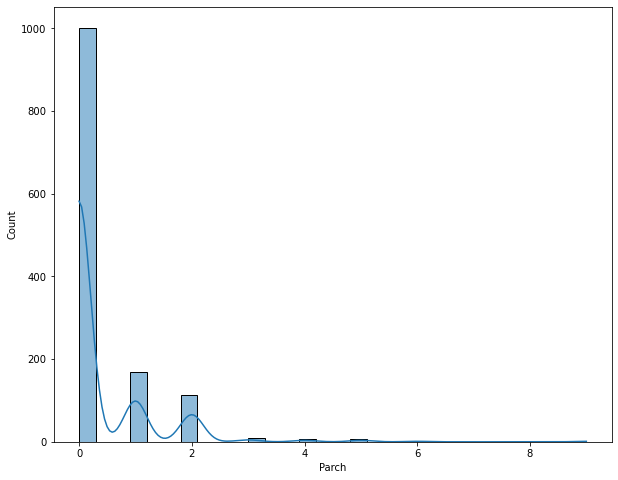

In [11]:
nulo(data_df["Parch"])
histograma(data_df["Parch"])

### Análise coluna: Fare

Existem 1 linhas nulas nesta coluna.


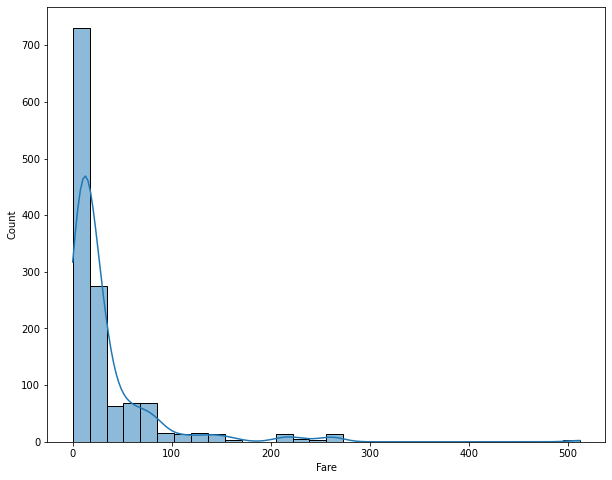

In [12]:
nulo(data_df["Fare"])
histograma(data_df["Fare"])

Como mo valor nulo dentro da coluna esta na tabela de teste, este foi mantido, também foi decidido colocar os valores dessa coluna em logaritimo para obter uma melhor distribuição.

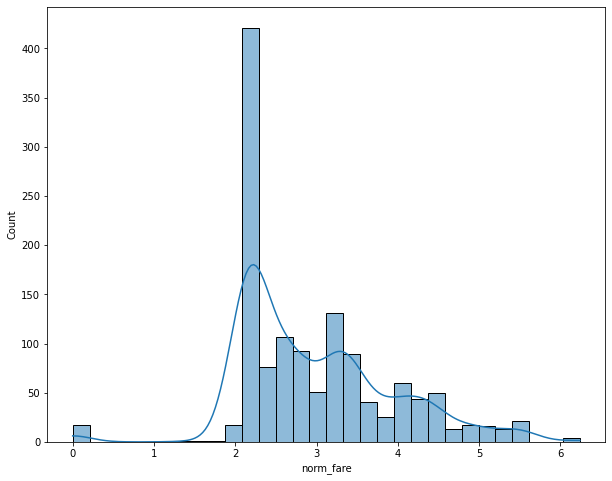

In [13]:
data_df["norm_fare"] = np.log(data_df["Fare"]+1)
histograma(data_df["norm_fare"])

### Análise coluna: Pclass

Existem 0 linhas nulas nesta coluna.


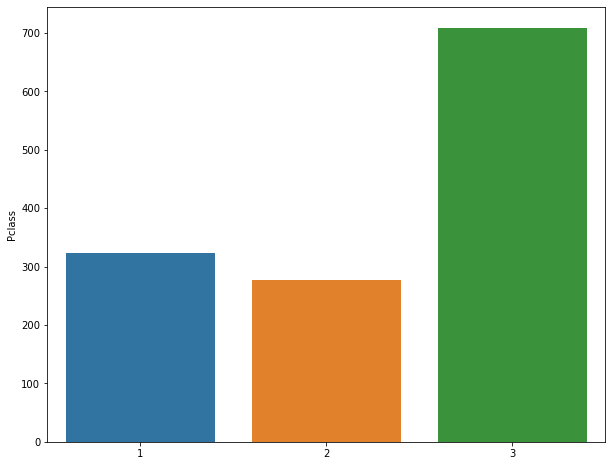

In [14]:
nulo(data_df["Pclass"])
grafico_barras(data_df["Pclass"])

Esta coluna foi mantida desta forma.

### Análise coluna: Sex

Existem 0 linhas nulas nesta coluna.


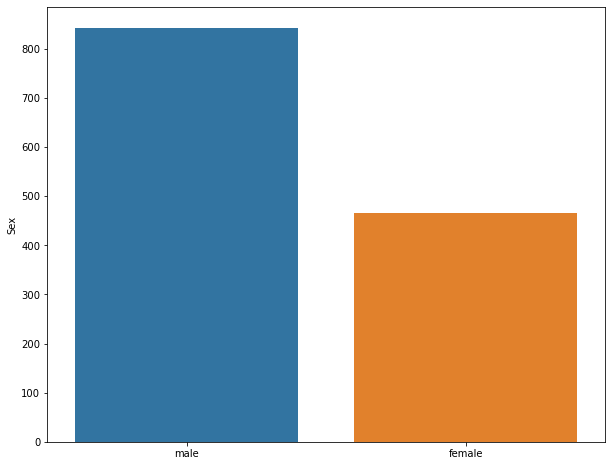

In [15]:
nulo(data_df["Sex"])
grafico_barras(data_df["Sex"])

Esta coluna foi mantida desta forma.

### Análise coluna: Ticket

In [16]:
nulo(data_df["Ticket"])
print(data_df["Ticket"].value_counts())

Existem 0 linhas nulas nesta coluna.
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64


Como existem muitos tipos de tickets diferentes foi optado por dividir entre dois grupos aqueles que possuem apenas valores numéricos e aqueles possuem letras dentro da string.

In [17]:
data_df["n_ticket"] = data_df["Ticket"].apply(lambda x : 1 if str(x).isnumeric() else 0)
print(data_df["n_ticket"].value_counts())

1    957
0    352
Name: n_ticket, dtype: int64


### Análise coluna: Embarked

Existem 2 linhas nulas nesta coluna.


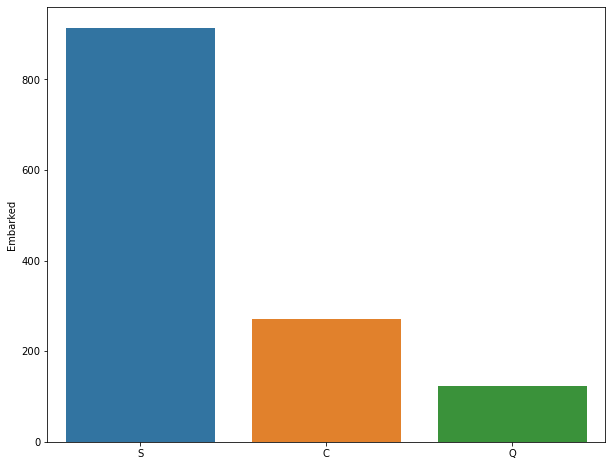

In [18]:
nulo(data_df["Embarked"])
grafico_barras(data_df["Embarked"])

Como há apenas 2 linhas nulas e estas estão na base de dados de treino e portanto estas serão removidas, aparte disso nada será mudado.

In [19]:
data_df.dropna(subset = ["Embarked"], inplace = True)

### Análise coluna: Name

In [20]:
nulo(data_df["Name"])
data_df["Name"].value_counts()

Existem 0 linhas nulas nesta coluna.


Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Balkic, Mr. Cerin                                      1
Petroff, Mr. Nedelio                                   1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1305, dtype: int64

Na coluna nomes é possível notar a presença de títulos acompanhando cada nome, assim como os nomes em si provavelmente não ajudaram na confecção do modelo foi optado por criar uma nova coluna de títulos e posteriormente retirar a coluna de nomes.

### Análise coluna: Titulos

In [21]:
data_df["Titulos"] = data_df["Name"].apply(lambda x: ((x.split(","))[1].split("."))[0])

display(data_df["Titulos"].value_counts())

 Mr              757
 Miss            259
 Mrs             196
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Titulos, dtype: int64

Como existem muitos títulos com um baixo número de pessoas , estes serão agrupados em uma mesma categoria.

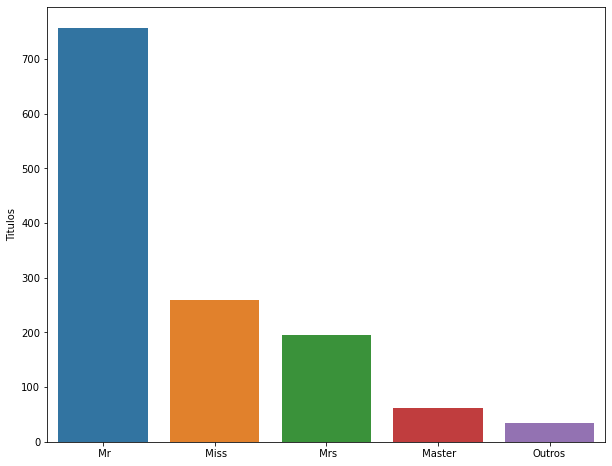

In [22]:
Outros = []

for tipo in data_df["Titulos"].value_counts().index:
    if data_df["Titulos"].value_counts()[tipo] < 10:
        Outros.append(tipo)

for tipo in Outros:
    data_df.loc[data_df["Titulos"] == tipo, "Titulos"] = "Outros"
    
grafico_barras(data_df["Titulos"])

## Analisando as colunas modificadas

In [23]:
print(data_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'treino_teste', 'norm_fare',
       'n_ticket', 'Titulos'],
      dtype='object')


Com a lista de colunas em mão serão removidas aquelas que não parecem fazer sentido dentro do modelo, sendo elas:

1. PassengerId - O Id dos passageiros não aparenta ser um fator determinante dentro de uma analise de sobreviventes
2. Ticket - Foram usados os casos onde haviam e não haviam letras dentro da classificação do ticket, aparte disso as informações dadas por esta coluna não parecem muito úteis
3. Name - O nome dos passageiros em si não apresenta relevância dentro do modelo, contudo foram usados os títulos presentes nesta coluna na formação do modelo
4. Fare - Foi criada uma coluna com os valores desta modificados como foi especificado na análise desta coluna, assim esta não será utilizada


In [24]:
data_df = data_df.drop(['PassengerId', 'Name', 'Ticket', "Fare"], axis = 1)
print(data_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'treino_teste', 'norm_fare', 'n_ticket', 'Titulos'],
      dtype='object')


### Modificando colunas de categorias

Após retirar as colunas indesejadas, as colunas divididas em categorias serão tranformadas em colunas dummies, sendo os valores da coluna "Pclass" sendo tranformados em string para que isso seja possível.

In [25]:
data_df["Pclass"] = data_df["Pclass"].apply(lambda x: str(x))

In [26]:
dummies_df = pd.get_dummies(data_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','treino_teste', 'norm_fare', 'n_ticket', 'Titulos']])

Com as colunas já divididas em dummies, agora dividiremos novamente os dataframes de teste e treino.

In [27]:
X_teste = dummies_df[dummies_df["treino_teste"] == 0].drop("treino_teste",axis = 1)
X_treino = dummies_df[dummies_df["treino_teste"] == 1].drop("treino_teste",axis = 1)

y_treino = data_df[data_df["treino_teste"] == 1].Survived
y_treino.shape

(889,)

In [28]:
display(dummies_df["Parch"].value_counts())

0    1000
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

### Escalonando os dados

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dummies_scaled = dummies_df.copy()
dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scaler.fit_transform(dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

In [30]:
dummies_scaled.columns

Index(['Age', 'SibSp', 'Parch', 'treino_teste', 'norm_fare', 'n_ticket',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Titulos_ Master',
       'Titulos_ Miss', 'Titulos_ Mr', 'Titulos_ Mrs', 'Titulos_Outros'],
      dtype='object')

In [31]:
X_teste_scaled = dummies_scaled[dummies_scaled["treino_teste"] == 0].drop("treino_teste",axis = 1)
X_treino_scaled = dummies_scaled[dummies_scaled["treino_teste"] == 1].drop("treino_teste",axis = 1)

y_treino_scaled = data_df[data_df["treino_teste"] == 1].Survived

### Importando modelos de previsão

Os modelos testados serão:
- Gaussian NB
- Logistic Regression
- Decision Tree
- KNeighbors
- Random Forest

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Testando Cross_val_score dos modelos escolhidos

A função Cross_val_score é uma função no pacote scikit-learn que treina e testa um modelo em várias dobras do seu conjunto de dados. Este método de validação cruzada fornece uma compreensão melhor do desempenho do modelo em todo o conjunto de dados, em vez de apenas uma única divisão de treinamento/teste.
Usaremos este método para testar todos os modelos 5 vezes e depois obter a média entre eles.

### Logistic Regression

In [33]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_treino_scaled,y_treino, cv = 5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.80337079 0.80337079 0.86440678]
0.8223195581793945


### Gaussian NB

In [34]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_treino_scaled, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.78651685 0.76966292 0.83050847]
0.7919443915444677


### Decision Tree

In [35]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_treino_scaled, y_treino, cv = 5)
print(cv)
print(cv.mean())

[0.74157303 0.76966292 0.84831461 0.74157303 0.74576271]
0.769377261474005


### KNeighbors 

In [36]:
kn = KNeighborsClassifier()
cv = cross_val_score(kn, X_treino_scaled, y_treino, cv = 5)
print(cv)
print(cv.mean())

[0.78651685 0.79775281 0.82022472 0.80898876 0.8079096 ]
0.8042785501174381


### Random Forest

In [37]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_treino_scaled, y_treino, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.79213483 0.85955056 0.74719101 0.82485876]
0.8076683806259126


Com estes testes notou-se que o modelo de maior sucesso foi o de logistic regression, porém serão todos os modelos testados e posteriormente enviados a competição para melhor testar sua acurâcia.
Agora serão criadas as variáveis de treino e teste.

In [38]:
X_treino1 = X_treino_scaled.copy().fillna(-1)
y_treino1 = y_treino.copy().fillna(-1)
X_teste1 = X_teste_scaled.copy().fillna(-1)

Com as variáveis de treino e teste criadas faremos o teste final em cada modelo além de criar os arquivos em csv com as respostas final de cada modelo.

### Modelo Logistic Regression

In [39]:
lr.fit(X_treino1, y_treino1)
p2 = lr.predict(X_teste1).astype(int)

df = {"PassengerId" : sv["PassengerId"], "Survived":p2}
df3 = pd.DataFrame(data = df)

df3.to_csv("submissaolr.csv", index = False)

### Modelo Decision Tree

In [40]:
dt.fit(X_treino1,y_treino1)
p3 = dt.predict(X_teste1).astype(int)

df = {"PassengerId" : sv["PassengerId"], "Survived":p3}
df4 = pd.DataFrame(data = df)

df4.to_csv("submissaodt.csv", index = False)

### Modelo KNeighbors

In [41]:
kn.fit(X_treino1, y_treino1)
p4 = kn.predict(X_teste1).astype(int)

kn_df = {"PassengerId": sv["PassengerId"], "Survived": p4}
kn_df1 = pd.DataFrame(data = kn_df)

kn_df1.to_csv("submissaokn.csv", index = False)

### Modelo Random Forest

In [42]:
rf.fit(X_treino1, y_treino1)
p5 = rf.predict(X_teste1).astype(int)

df = {"PassengerId": sv["PassengerId"], "Survived":p5}
rf_df = pd.DataFrame(data = df)

rf_df.to_csv("submissaorf.csv", index = False)

### Modelo Gaussian NB

In [43]:
gnb.fit(X_treino1, y_treino1)
p = gnb.predict(X_teste1)

df = {"PassengerId": sv["PassengerId"], "Survived":p}
gnb_df = pd.DataFrame(data = df)

gnb_df.to_csv("submissaognb.csv", index = False)

Com isso terminasse o projeto e os arquivos podem ser enviados para a competição.